AGENDA
1. Objetivo de estudio
2. Exploración de datos EDA
3. Limpieza de datos
4. Entrenar el modelo (árbol de decisión)
5. Evaluar el modelo




In [77]:
#Tratamiento de datos
import pandas as pd
import numpy as np

#Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

#Modelab
from sklearn.model_selection import train_test_split #Partir el dataset
from sklearn.tree import DecisionTreeRegressor #Modelo de árbol de decisión
from sklearn.tree import plot_tree #Dibujar el árbol de decisión
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

#OBJETIVO
Crear y evaluar un modelo de árbol de decision para predecir las ventas con datos simulador de una empresa, dependiendo de las inversiones realizadas en publicidad

In [78]:
import pandas as pd
datos=pd.read_csv("https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/Advertising_Web.csv")
datos.head()

,Unnamed: 0,X,TV,Radio,Newspaper,Web,Sales
0,1,1,230.1,37.8,69.2,306.634752,22.1
1,2,2,44.5,39.3,45.1,302.653070,10.4
2,3,3,17.2,45.9,69.3,49.498908,9.3
3,4,4,151.5,41.3,58.5,257.816893,18.5
4,5,5,180.8,10.8,58.4,195.660076,12.9


### Relación entre variables independientes y dependiente (Ventas)
Vamos a visualizar la relación entre cada variable de publicidad y las ventas utilizando diagramas de dispersión.

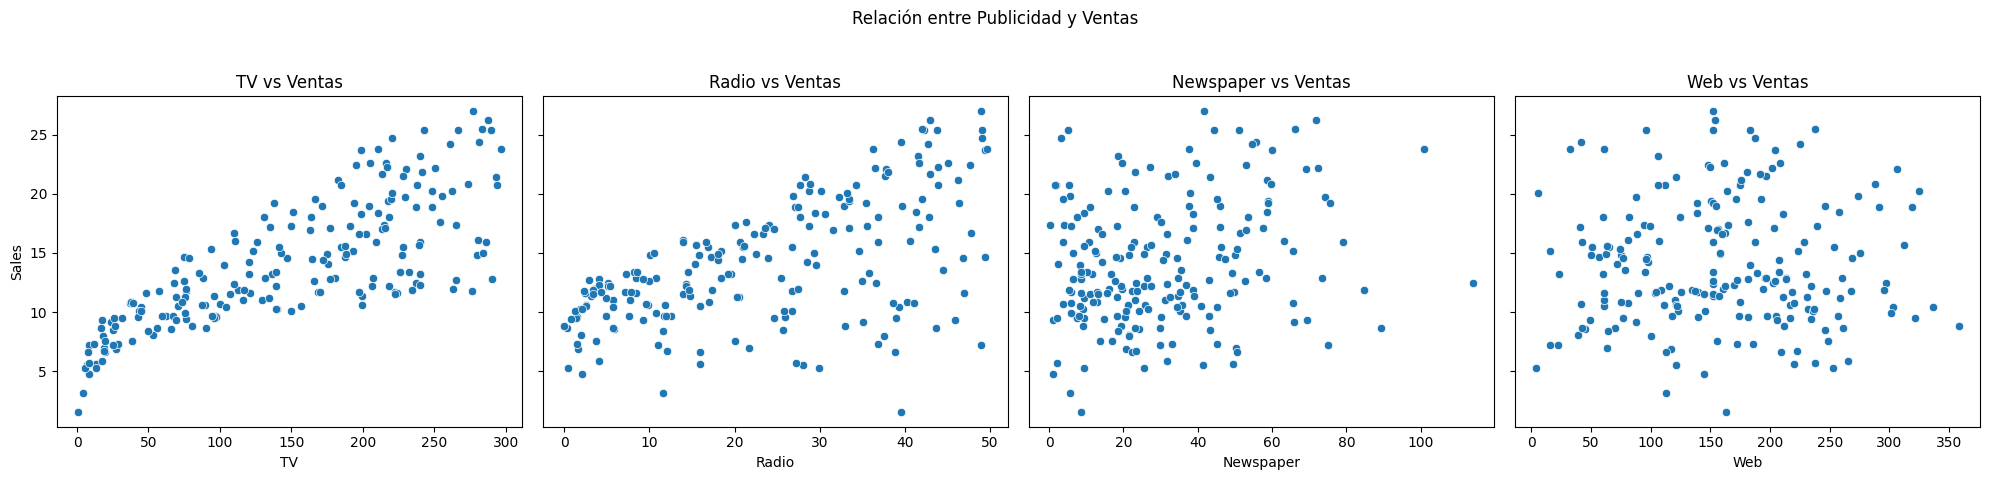

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
fig.suptitle('Relación entre Publicidad y Ventas')

sns.scatterplot(ax=axes[0], x='TV', y='Sales', data=datos)
axes[0].set_title('TV vs Ventas')

sns.scatterplot(ax=axes[1], x='Radio', y='Sales', data=datos)
axes[1].set_title('Radio vs Ventas')

sns.scatterplot(ax=axes[2], x='Newspaper', y='Sales', data=datos)
axes[2].set_title('Newspaper vs Ventas')

sns.scatterplot(ax=axes[3], x='Web', y='Sales', data=datos)
axes[3].set_title('Web vs Ventas')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent suptitle overlap
plt.show()

2. Exploración de datos - EDA

In [80]:
print("Observaciones y variables ", datos.shape)

Observaciones y variables  (200, 7)


In [81]:
datos.dtypes #Revisar si hay celdas que no aporten información

,0
Unnamed: 0,int64
X,int64
TV,float64
Radio,float64
Newspaper,float64
Web,float64
Sales,float64


In [82]:
datos.info()#Revisar si hay nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   X           200 non-null    int64  
 2   TV          200 non-null    float64
 3   Radio       200 non-null    float64
 4   Newspaper   200 non-null    float64
 5   Web         200 non-null    float64
 6   Sales       200 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 11.1 KB


Se describen las variables como variables independientes TV, radio, Newspaper y Web. Como variables independientes Sales.

Las variables independientes son:
* TV: costos de publicidad en TV (miles de dólares)
* Radio: costos de publicidad en medios de difusión (miles de dólares)
* Newspaper: costos de publicidad para medios impresos (miles de dólares)
* Web: costos de publicidad en herramientas difitales (miles de dólares)

In [83]:
datos.head()

,Unnamed: 0,X,TV,Radio,Newspaper,Web,Sales
0,1,1,230.1,37.8,69.2,306.634752,22.1
1,2,2,44.5,39.3,45.1,302.653070,10.4
2,3,3,17.2,45.9,69.3,49.498908,9.3
3,4,4,151.5,41.3,58.5,257.816893,18.5
4,5,5,180.8,10.8,58.4,195.660076,12.9


3. Limpieza de datos

In [84]:
datos = datos[["TV", "Radio", "Newspaper", "Web", "Sales"]]
datos.describe()

,TV,Radio,Newspaper,Web,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,159.587355,14.022500
std,85.854236,14.846809,21.778621,76.815266,5.217457
min,0.700000,0.000000,0.300000,4.308085,1.600000
25%,74.375000,9.975000,12.750000,99.048767,10.375000
50%,149.750000,22.900000,25.750000,156.862154,12.900000
75%,218.825000,36.525000,45.100000,212.311848,17.400000
max,296.400000,49.600000,114.000000,358.247042,27.000000


##4. Datos de entrenamiento y datos de validación (Entrenamiento del modelo)
Se empleará la semilla 1279 con un (random_state=2022)
Los datos se distribuirán de la siguiente manera:
* 70% para entrenamiento
* 30% para validación del modelo

In [85]:
 #Partir el dataset

x_entrena,x_valida,y_entrena,y_valida=train_test_split(datos.drop(columns="Sales"),datos["Sales"],train_size=.7,random_state=2022)
#Asignamos la variable dependiente e independiente, y asignamos la repartición de manera aleatoria con random state, con el fin de que los datos salgan iguales en todas las reparticiones.

In [86]:
x_entrena.shape

(140, 4)

##4.1 Modelando el árbol de decisión
La clase DecisiónTreeRegresor del módulo sklearn.tree tiene los siguientes parámetros:
max_depth: produndidad máxima que puede alcanzar el árbol.
min_samples_split: numero minimi de observaciones que debe deterne el nodo para que pueda dividirse. Si es un valor decimal seinterpreta como la fracción total de observaciones de entrenamiento ceil(min_samples_split*n_samples).
min_samples_leaf: numero minimo de observaciones que debe tener cada uno de los nodos hijos para que se produzca la división.
max_leaf_nodes: número máximo de nodos terminales
random_seed: semilla que permite resultados reproducibles Es un valor entero


In [87]:
modelo_ar=DecisionTreeRegressor(max_depth=3,random_state=2022)

Usamos los datos de entrenamiento(x_entrena, y_entrena9 con el modelo del árbol de regresión

In [88]:
modelo_ar.fit(x_entrena,y_entrena)

DecisionTreeRegressor(max_depth=3)

In [89]:
print(f"Profundidad del árbol: {modelo_ar.get_depth()}")
print(f"Número de nodos terminales: {modelo_ar.get_n_leaves()}")

Profundidad del árbol: 3
Número de nodos terminales: 8


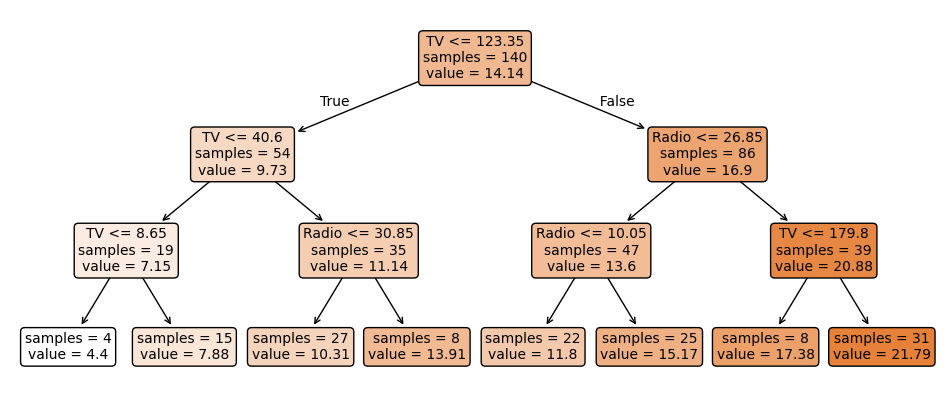

In [90]:
fig,ax=plt.subplots(figsize=(12,5))
plot=plot_tree(
    decision_tree=modelo_ar,
    feature_names=datos.drop(columns="Sales").columns,
    filled=True,
    impurity=False,
    fontsize=10,
    rounded=True,
    precision=2,
    ax=ax
)

##4.3 Predicciones
La importancia de cada predictor en el modelo se calcula como la reduccion total (normalizada) en el criterio de división. En este caso, el mse que consigue el predictor en las divisiones en las que participa. Si un predictor no se ha seleccionado en ninguna división, no se incluye en el modelo y su importancia es 0

In [91]:
importancia_predictores=pd.DataFrame(
    {
        "predictor":datos.drop(columns="Sales").columns,
        "importancia":modelo_ar.feature_importances_
    }
)

In [92]:
importancia_predictores.sort_values(by="importancia",ascending=False)

,predictor,importancia
0,TV,0.605295
1,Radio,0.394705
2,Newspaper,0.000000
3,Web,0.000000
